In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
alpha = np.random.uniform(0,1)
betta = np.random.uniform(0,1)
eps = 0.001

k = np.array([i for i in range(101)])
xk = k/100
delta = np.random.normal(0, 1, size=len(xk))
yk = alpha*xk + betta + delta

In [ ]:
def linear(x,a,b):
    return a*x+b

In [ ]:
def rational(x,a,b):
    return a/(1+b*x)

In [ ]:
def grad_Dlin(a, b):
    return np.array([DerivDA(a, b), DerivDB(a, b)])

In [ ]:
def DerivDB(a, b):
    DerivB = 2*a*np.sum(xk)-2*np.sum(yk)+2*b*101
    return DerivB

In [ ]:
def DerivDA(a, b):
    DerivA = 2*a*(np.sum(xk)**2)+2*b*np.sum(xk)-2*np.sum(xk)*np.sum(yk)
    return DerivA

In [ ]:
def D(a, b):
    DFunc = (a**2)*(np.sum(xk)**2)+2*a*b*np.sum(xk)-2*a*np.sum(xk)*np.sum(yk)-2*b*np.sum(yk)+101*b**2+np.sum(yk)**2
    return DFunc

In [ ]:
def DRat(a, b):
	return np.sum((rational(xk, a, b) - yk)**2)

In [ ]:
def grad_DRat(a, b):
    return np.array([DerivRatDA(a, b), DerivRatDB(a, b)])

In [ ]:
def DerivRatDA(a, b):
	return 2*np.sum(a/(1 + b*xk)**2 - yk/(1 + b*xk))

In [ ]:
def DerivRatDB(a, b):
	return 2*np.sum(-a**2*xk/(1 + b*xk)**3 + a*xk*yk/(1 + b*xk)**2)

In [ ]:
def ConjugateGradDescentLin(e):
    FuncCalcs = 1
    gamma = 0.00001
    point = [np.array([0.1, 0.1], dtype = float)]
    GradAB = [-grad_Dlin(point[-1][0], point[-1][1])]

    alpha = np.arange(gamma, e, gamma)

    MinOfF = D(point[-1][0] + alpha[0] * GradAB[-1][0], point[-1][1] + alpha[0] * GradAB[-1][1])

    Alpha0 = alpha[0]
    for i in alpha:
        DVal = D(point[-1][0] + i*GradAB[-1][0], point[-1][1] + i*GradAB[-1][1])
        if DVal < MinOfF:
            MinOfF = DVal
            Alpha0 = i

    Step = Alpha0
    point += [point[-1] + Step*GradAB[-1]]
    S = [GradAB[-1]]
    while np.linalg.norm(point[-2] - point[-1]) > e:
        GradAB += [-grad_Dlin(point[-1][0], point[-1][1])]
        bet = np.sum(GradAB[-1] ** 2) / np.sum(GradAB[-2] ** 2)
        S += [GradAB[-1] + bet * S[-1]]

        alpha = np.arange(gamma, e, gamma)

        MinOfF = D(point[-1][0] + alpha[0] * S[-1][0], point[-1][1] + alpha[0] * S[-1][1])

        Alpha0 = alpha[0]
        for i in alpha:
            DVal = D(point[-1][0] + i * S[-1][0], point[-1][1] + i * S[-1][1])
            if DVal < MinOfF:
                MinOfF = DVal
                Alpha0 = i

        Step = Alpha0
        point += [point[-1] + Step * S[-1]]
        FuncCalcs += 1
    return point[-1]

In [ ]:
def ConjugateGradDescentRat(e):
    FuncCalcs = 1
    gamma = 0.00001
    point = [np.array([0.1, 0.1], dtype = float)]

    GradAB = [-grad_DRat(point[-1][0], point[-1][1])]

    alpha = np.arange(gamma, e, gamma)

    MinOfF = DRat(point[-1][0] + alpha[0] * GradAB[-1][0], point[-1][1] + alpha[0] * GradAB[-1][1])

    Alpha0 = alpha[0]
    for i in alpha:
        DVal = DRat(point[-1][0] + i*GradAB[-1][0], point[-1][1] + i*GradAB[-1][1])
        if DVal < MinOfF:
            MinOfF = DVal
            Alpha0 = i

    Step = Alpha0
    point += [point[-1] + Step*GradAB[-1]]

    S = [GradAB[-1]]

    while np.linalg.norm(point[-2] - point[-1]) > e:
        GradAB += [-grad_DRat(point[-1][0], point[-1][1])]
        bet = np.sum(GradAB[-1] ** 2) / np.sum(GradAB[-2] ** 2)
        S += [GradAB[-1] + bet * S[-1]]

        alpha = np.arange(gamma, e, gamma)

        MinOfF = DRat(point[-1][0] + alpha[0] * S[-1][0], point[-1][1] + alpha[0] * S[-1][1])

        Alpha0 = alpha[0]
        for i in alpha:
            DVal = DRat(point[-1][0] + i * S[-1][0], point[-1][1] + i * S[-1][1])
            if DVal < MinOfF:
                MinOfF = DVal
                Alpha0 = i

        Step = Alpha0
        point += [point[-1] + Step * S[-1]]
        FuncCalcs += 1
    return point[-1]

In [ ]:
ConjugateGradDescentRat(0.001)

array([1.00848893, 0.13470959])

In [ ]:
xx1=np.empty(101)
for i in range(101):
    xx1[i] = rational(i/100,1,0.1924717)

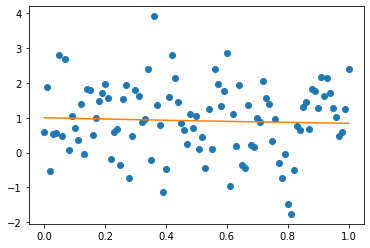

In [ ]:
plt.plot(xk,yk,'o')
plt.plot(xk,xx1)